In [ ]:
# paths to results for lineage level predictions for NA, EU and Asia

results_CNT = "North_America/HPC/results/Connecticut_results.json"
results_NE = "Europe/HPC/results/Northern_Estonia_results.json" 
results_MH = "Asia/HPC /results/Maharashtra_results.json"

In [ ]:
import os
if os.path.isdir("figures") == False:
    os.mkdir("figures")

In [ ]:
import json
from utils.helper_functions import * 
from utils.plotting_functions import * 
from statistics import mean,stdev 

continents = ["North_America", "Europe", "Asia"]
locations = [["Connecticut", "USA", "North_America", "Global", "Global_next_regions"], ["Estonia", "Europe", "Global", "Global_next_regions"] , ["India", "Asia", "Global", "Global_next_regions"]]
seeds = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
abundances = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
results = [("North_America", results_CNT), ("Europe",results_NE), ("Asia", results_MH)]

all_results = dict()
all_mean_results = dict()
all_std_results = dict()

for ((continent, results_path), locs) in zip(results, locations):
    with open(results_path) as json_file:
        res_file = json.loads(json_file.read())
    # calculate absolute errors
    absolute_errors = calculate_absolute_errors(res_file, seeds, abundances, locs)
    # calculate  mean absolute errors per location & abundance
    mean_abs_errors = dict()
    stds = dict()
    for loc in locs:
        mean_abs_errors[loc] = dict()
        stds[loc] = dict()
        for ab in abundances:
            mean_abs_errors[loc][ab] = round(mean(absolute_errors[loc][ab].values()),2)
            stds[loc][ab] = round(stdev(absolute_errors[loc][ab].values()),2)

    all_results[continent] = absolute_errors
    all_std_results[continent] = stds
    all_mean_results[continent] = mean_abs_errors

In [ ]:
# plot the mean absolute error per simulated abundance for each location in each continent
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from matplotlib.lines import Line2D

locations_colors = [[("Connecticut", "#CC79A7") , ("USA", "#d55e00"), ("North_America", "#56B4E9") , ("Global", "#0072b2"), ("Global_next_regions", "#009e73")],
 [("Estonia", "#d55e00"), ("Europe", "#56B4E9"), ("Global", "#0072b2"), ("Global_next_regions", "#009e73")] ,
  [("India", "#d55e00"), ("Asia", "#56B4E9"), ("Global", "#0072b2"), ("Global_next_regions", "#009e73")]]





fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5),sharex=True, sharey=True)
fig.set_dpi(120)
for continent, ax, locs in zip(continents, [ax1,ax2, ax3], locations_colors):
    ax.grid()
    ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
    # ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
    ax.set_title(continent.replace("_", " "))
    for (loc, col) in locs:
        ax.errorbar(abundances, list(all_mean_results[continent][loc].values()), list(all_std_results[continent][loc].values()), color = col)
        y = list(all_mean_results[continent][loc].values())
        std = list(all_std_results[continent][loc].values())
        addition = [sum(x) for x in zip(y, std)]
        substraction = [yi - stdi for yi, stdi in zip(y, std)]
        # comment out next line for non continuous error bars
        ax.fill_between(abundances, substraction, addition, color= col, alpha=0.15, interpolate=True)
        ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100])

custom_lines = [Line2D([0], [0], color = "#cc79a7", lw=1),
                Line2D([0], [0], color = "#d55e00", lw=1),
                Line2D([0], [0], color = "#56B4E9", lw=1),
                Line2D([0], [0], color = "#0072b2", lw=1),
                Line2D([0], [0], color = "#009e73", lw=1)]

fig.legend(custom_lines,
 ["State", "Country", "Continent", "Global", "Global next regions"],
  loc="center right",   # Position of legend
  bbox_to_anchor=(1.11, 0.5)
)

fig.text(0.5, 0.04, 'Simulated abundance', va='center', ha='center')
fig.text(0.07, 0.5, 'Absolute error', va='center', ha='center', rotation='vertical')
fig.savefig("figures/lineplots.pdf", bbox_inches='tight')

plot voc level predictions vs lineage level predictions

In [ ]:

# paths to results for lineage level predictions and voc level predictions for the Connecticut experiment
results_CNT_who = "North_America/HPC/results/Connecticut_results_who.json"
results_CNT = "North_America/HPC/results/Connecticut_results.json"

In [ ]:
import json
from utils.helper_functions import * 
from utils.plotting_functions import * 
from statistics import mean,stdev 

locations = [["Connecticut", "Global"], ["Connecticut", "Global"]]
seeds = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
abundances = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
results = [("Lineage level predictions", results_CNT), ("VOC level predictions", results_CNT_who)]

all_results = dict()
all_mean_results = dict()
all_std_results = dict()

for ((prediction_level, results_path), locs) in zip(results, locations):
    with open(results_path) as json_file:
        res_file = json.loads(json_file.read())
    # calculate absolute errors
    absolute_errors = calculate_absolute_errors(res_file, seeds, abundances, locs)
    # calculate  mean absolute errors per location & abundance
    mean_abs_errors = dict()
    stds = dict()
    for loc in locs:
        mean_abs_errors[loc] = dict()
        stds[loc] = dict()
        for ab in abundances:
            mean_abs_errors[loc][ab] = round(mean(absolute_errors[loc][ab].values()),2)
            stds[loc][ab] = round(stdev(absolute_errors[loc][ab].values()),2)

    all_results[prediction_level] = absolute_errors
    all_std_results[prediction_level] = stds
    all_mean_results[prediction_level] = mean_abs_errors

[3.52, 3.33, 3.38, 3.04, 3.18, 2.87, 2.79, 2.76, 2.57, 2.47, 1.32, 0.63, 1.82, 3.78, 5.41, 7.23, 8.95, 11.01, 12.63] [0.49, 0.61, 0.69, 0.52, 0.63, 0.81, 0.63, 0.91, 0.67, 0.59, 0.69, 0.43, 0.71, 0.84, 1.07, 0.89, 0.87, 0.69, 0.72]
[3.52, 3.33, 3.38, 3.04, 3.18, 2.87, 2.79, 2.76, 2.57, 2.47, 1.32, 0.63, 1.82, 3.78, 5.41, 7.23, 8.95, 11.01, 12.63] [0.49, 0.61, 0.69, 0.52, 0.63, 0.81, 0.63, 0.91, 0.67, 0.59, 0.69, 0.43, 0.71, 0.84, 1.07, 0.89, 0.87, 0.69, 0.72]
[0.97, 1.95, 3.0, 3.96, 4.94, 5.99, 6.94, 7.99, 8.95, 9.98, 19.92, 29.96, 39.96, 49.97, 59.91, 69.97, 79.94, 89.9, 99.89] [0.11, 0.1, 0.0, 0.09, 0.12, 0.04, 0.14, 0.05, 0.11, 0.07, 0.16, 0.12, 0.09, 0.09, 0.24, 0.1, 0.14, 0.28, 0.3]
[3.79, 3.38, 3.23, 2.74, 2.56, 2.3, 1.94, 1.87, 1.42, 1.33, 0.8, 2.47, 4.41, 6.56, 8.1, 10.13, 12.16, 14.82, 18.28] [0.4, 0.54, 0.56, 0.58, 0.42, 0.69, 0.54, 0.78, 0.59, 0.56, 0.54, 0.95, 0.82, 1.15, 1.02, 1.33, 1.08, 0.96, 0.85]


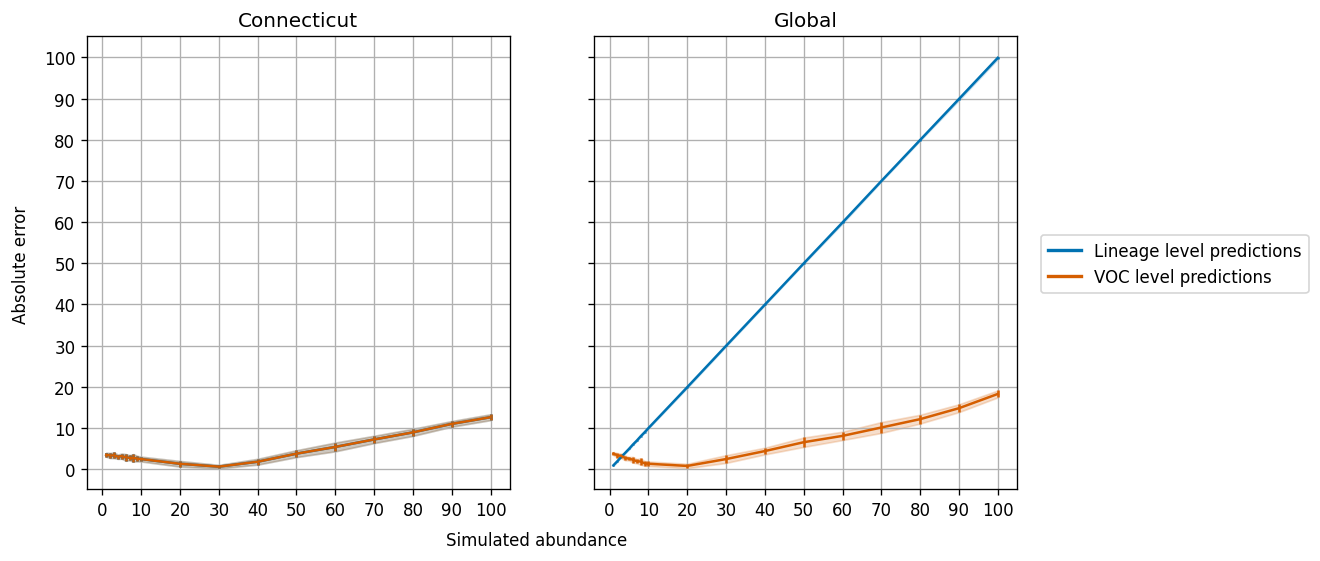

In [29]:
# plot the mean absolute error per simulated abundance for each location in each continent
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from matplotlib.lines import Line2D

prediction_level_colors = [[("Lineage level predictions", "#0072b2") , ("VOC level predictions", "#d55e00")],
 [("Lineage level predictions", "#0072b2") , ("VOC level predictions", "#d55e00")] ]

prediction_levels = ["Lineage level predictions", "VOC level predictions"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5),sharex=True, sharey=True)
fig.set_dpi(120)

for (loc, ax), precol in zip([("Connecticut", ax1), ("Global", ax2)], prediction_level_colors):
    ax.grid()
    ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
    ax.set_title(loc)
    
    for (pl, col) in precol:
        print(list(all_mean_results[pl][loc].values()), list(all_std_results[pl][loc].values()))
        ax.errorbar(abundances, list(all_mean_results[pl][loc].values()), list(all_std_results[pl][loc].values()), color = col)
        y = list(all_mean_results[pl][loc].values())
        std = list(all_std_results[pl][loc].values())
        addition = [sum(x) for x in zip(y, std)]
        substraction = [yi - stdi for yi, stdi in zip(y, std)]
        # comment out next line for non continuous error bars
        ax.fill_between(abundances, substraction, addition, color= col, alpha=0.2, interpolate=True)

        ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100])

custom_lines = [Line2D([0], [0], color = "#0072b2", lw=2),
                Line2D([0], [0], color = "#d55e00", lw=2)]

fig.legend(custom_lines,
  prediction_levels,
  loc="center right",   # Position of legend
  bbox_to_anchor=(1.15, 0.5)
)

fig.text(0.5, 0.04, 'Simulated abundance', va='center', ha='center')
fig.text(0.07, 0.5, 'Absolute error', va='center', ha='center', rotation='vertical')
fig.savefig("figures/lineplots_who.pdf", bbox_inches='tight')